# ノーベル賞受賞者のデータ

Wikipediaからスクレイピングしてきたノーベル賞受賞者のデータを使って、データ可視化の6ステップのうち、前半の3ステップをたどります。

1. 問いの設定
2. データの用意
3. データの探索

(---ここまで---)

4. 仮説の設定
5. データの分析
6. データの説明

In [1]:
# ライブラリをロードする
import pandas as pd
import numpy as np

## 問いの設定

歴代ノーベル賞受賞者の属性に共通するパターンはあるか？

## データの用意

この演習では、手元にすでにスクレイピング済みのデータがあると仮定します。

PythonによるWebスクレイピングに有用なライブラリとして、下記があります。Webスクレイピングの例は[この演習](./web-scraping-tutorial.ipynb)で。

* [requests](https://requests-docs-ja.readthedocs.io/en/latest/): HTTP通信用のライブラリ
* [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): XMLパース用のライブラリ
* [Scrapy](https://scrapy.org/): スクレイピング、クローリング用のフレームワーク

In [3]:
# JSON形式のファイルを読み込む

import pandas as pd
file_url = "./data/nobel_winners_dirty.json"
df = pd.read_json(file_url)

JSONとは、JavaScript Object Notationの略で、以下のような形式のデータです。

```
[
  {
    "born_in": "",
    "category": "Physiology or Medicine",
    "country": "Argentina",
    "date_of_birth": "8 October 1927",
    "date_of_death": "24 March 2002",
    "gender": "male",
    "link": "http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein",
    "name": "César Milstein",
    "place_of_birth": "Bahía Blanca ,  Argentina",
    "place_of_death": "Cambridge , England",
    "text": "César Milstein , Physiology or Medicine, 1984",
    "year": 1984
  },
  {
    "born_in": "Bosnia and Herzegovina",
    "category": "Literature",
    "country": "",
    "date_of_birth": "9 October 1892",
    "date_of_death": "13 March 1975",
    "gender": "male",
    "link": "http://en.wikipedia.org/wiki/Ivo_Andric",
    "name": "Ivo Andric *",
    "place_of_birth": "Dolac (village near Travnik), Austria-Hungary (present-day Bosnia and Herzegovina)",
    "place_of_death": "Belgrade, SR Serbia, SFR Yugoslavia (present-day Serbia)",
    "text": "Ivo Andric *,  born in then  Austria–Hungary , now Bosnia and Herzegovina , Literature, 1961",
    "year": 1961
  }
]
```

### データの確認

In [4]:
# まずはデータの形をざっと確認

df.head()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,Institut de Droit International,None,None,"Institut de Droit International , Peace, 1904",1904
4,,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909


In [5]:
# 列を見る

df.columns

Index(['born_in', 'category', 'country', 'date_of_birth', 'date_of_death',
       'gender', 'link', 'name', 'place_of_birth', 'place_of_death', 'text',
       'year'],
      dtype='object')

In [6]:
# 行を見る

df.index

RangeIndex(start=0, stop=1052, step=1)

In [7]:
# 概要を見る

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   born_in         1052 non-null   object
 1   category        1052 non-null   object
 2   country         1052 non-null   object
 3   date_of_birth   1044 non-null   object
 4   date_of_death   1044 non-null   object
 5   gender          1040 non-null   object
 6   link            1052 non-null   object
 7   name            1052 non-null   object
 8   place_of_birth  1044 non-null   object
 9   place_of_death  1044 non-null   object
 10  text            1052 non-null   object
 11  year            1052 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 98.8+ KB


ここから、一部のフィールド（性別など）が欠損していることが分かります（1052行のところ、1044要素しかないなど）。

また、読み込んだばかりの状態では、`year`のみが数値（`int64`）になっており、他の変数はオブジェクトとして扱われていることが分かります。オブジェクトはpandasのデフォルトのデータ型で、任意の数値、文字列、日時などを表すことができます。

In [8]:
# 要約統計量を見る

df.describe()

,year
count,1052.000000
mean,1968.729087
std,33.155829
min,1809.000000
25%,1947.000000
50%,1975.000000
75%,1996.000000
max,2014.000000


要約統計量は、デフォルトの状態では数値列だけが表示されます。

最小値は1809ですが、ノーベル賞の授与は1901年から始まったので明らかに正しくない数値が含まれていることが分かります。最大値は2014で、2014年までの受賞者が含まれているようです。

`describe`にパラメータを与えることで、オブジェクトにもアクセスするように指定できます。

In [9]:
df.describe(include=["object"])

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text
count,1052,1052,1052,1044,1044,1040,1052,1052,1044,1044,1052
unique,40,7,59,853,563,2,893,998,735,410,1043
top,,Physiology or Medicine,United States,9 May 1947,,male,http://en.wikipedia.org/wiki/Marie_Curie,Ronald Coase,,,"Betty Williams , Peace, 1976"
freq,910,250,350,4,362,982,4,2,29,409,2


ここから、受賞者には59の国籍があり、米国が350で最大のグループであるなどの情報が得られます。

また、生年月日は全部で1044ありますが、異なり数は853であることが分かります。複数の受賞者が生まれた縁起の良い日があるか、受賞者のデータが重複している可能性があります。

氏名の異なり数が998というのも、受賞者のデータが重複している可能性を示すものです。2つ以上の賞を受賞している人は数名いますが（調べた限りでは4名）、54の重複はそれに対して多すぎます。

[Multiple Nobel Prize laureates](https://www.nobelprize.org/prizes/facts/nobel-prize-facts/#:~:text=Linus%20Pauling%20is%20the%20only,the%201962%20Nobel%20Peace%20Prize.)

In [10]:
# もう一度、生データを確認

df.head(10)

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,Institut de Droit International,None,None,"Institut de Droit International , Peace, 1904",1904
4,,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909
5,,Literature,Belgium,29 August 1862,6 May 1949,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911
6,,Peace,Belgium,22 April 1854,14 May 1943,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Henri La Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913
7,,Physiology or Medicine,Belgium,13 June 1870,6 April 1961,male,http://en.wikipedia.org/wiki/Jules_Bordet,Jules Bordet,"Soignies, Belgium",,"Jules Bordet , Physiology or Medicine, 1919",1919
8,,Physiology or Medicine,Belgium,28 March 1892,18 July 1968,male,http://en.wikipedia.org/wiki/Corneille_Heymans,Corneille Heymans,"Ghent , Flanders","Knokke , Flanders","Corneille Heymans , Physiology or Medicine, 1938",1938
9,,Peace,Belgium,1910-02-10,1969-01-30,male,http://en.wikipedia.org/wiki/Georges_Pire,Georges Pire,"Dinant , Belgium","Leuven , Belgium","Georges Pire , Peace, 1958",1958


In [11]:
df.tail(5)

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
1047,,Physics,Australia,"February 24, 1967",,male,http://en.wikipedia.org/wiki/Brian_P._Schmidt,Brian P. Schmidt,"Missoula, Montana",,"Brian P. Schmidt , born in the United States ...",2011
1048,,Peace,Argentina,"November 1, 1878","May 5, 1959",male,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina","Carlos Saavedra Lamas , Peace, 1936",1936
1049,,Physiology or Medicine,Argentina,1887-04-10,1971-09-21,male,http://en.wikipedia.org/wiki/Bernardo_Houssay,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina","Bernardo Houssay , Physiology or Medicine, 1947",1947
1050,,Chemistry,Argentina,1906-9-6,1987-12-2,male,http://en.wikipedia.org/wiki/Luis_Federico_Leloir,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina","Luis Federico Leloir , Chemistry, 1970",1970
1051,,Peace,Argentina,"November 26, 1931",,male,http://en.wikipedia.org/wiki/Adolfo_P%C3%A9rez...,Adolfo Pérez Esquivel,Buenos Aires,,"Adolfo Pérez Esquivel , Peace, 1980",1980


よく見ると、名前の後ろにアスタリスクがついている人がいたり、生年月日のフォーマットが統一されていなかったり、`born_in`の情報がほぼ存在しない、といったことが分かります。

ここまでの情報をもとに、現時点でのデータ仕様書を作っておきましょう。

前処理が終わった後にデータ仕様書をアップデートします。

In [ ]:
# 現時点のデータ仕様書を作る

| カラム | カラムの説明 | データ型 | データ型（理想） | 尺度 | 値の説明 | NULL | UNIQ | CHECK |
|:--|:--|:--|:--|:--|:--|:--|:--|:--|
| born_in | 出生地 | テキスト | カテゴリ | 名義尺度 |  | ✔ |  |  |
| category | 賞の種類 | テキスト | カテゴリ | 名義尺度 |  | ✔ |  | | 
| country | 国籍 | テキスト | カテゴリ | 名義尺度 |  | ✔ |  |  |
| date_of_birth | 生年月日 | テキスト | 数値 | 間隔尺度 |  | ✔ |  |  |
| date_of_death | 没年月日 | テキスト | 数値 | 間隔尺度 |  | ✔ |  |  |
| gender | 性別 | テキスト | カテゴリ | 名義尺度 |  | ✔ |  |  |
| link | ウィキペディアへのリンク | テキスト | テキスト | テキスト |  | ✔ |  |  |
| name | 氏名 | テキスト | テキスト | テキスト |  | ✔ |  |  |
| place_of_birth | 出生地 | テキスト | カテゴリ | 名義尺度 |  | ✔ |  |  |
| place_of_death | 死没地 | テキスト | カテゴリ | 名義尺度 |  | ✔ |  |  |
| text | 説明 | テキスト | テキスト | テキスト |  | ✔ |  |  |
| year | 受賞年 | 数値 | 数値 | 間隔尺度 |  | ✔ |  | 1901 $\leq$ x $\leq$ 2022 |

* `NULL`: 欠損値が存在する可能性があるか
* `UNIQ`: 重複しない値か
* `CHECK`: 満たすべき条件

In [11]:
# データの前処理（欠損値、重複、整列されていない行、不統一、エラー値、データの混合などに対処する）
# born_in

まずは、ほぼ存在しない`born_in`を適切に欠損値として処理できるようにします。

`apply`メソッドを使うと、セルに対して同じ処理を繰り返し実行できます。これを使って`born_in`の実際のデータ型（pandasのオブジェクトにラップされているもの）を見てみましょう。

In [12]:
df["born_in"].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
1047    <class 'str'>
1048    <class 'str'>
1049    <class 'str'>
1050    <class 'str'>
1051    <class 'str'>
Name: born_in, Length: 1052, dtype: object

`set`を使って集合をとることで、異なり値だけを取り出します。

In [13]:
set(df["born_in"].apply(type))

{str}

すべてのデータがテキスト型であることが分かりました。何もないように見えるセルにも空白文字（スペース、タブ、改行など）が入っているようです。

空白文字を欠損値（`NaN`）に置換しましょう。

In [17]:
!pip install numpy
import numpy as np
df["born_in"] = df["born_in"].replace("", np.nan)

In [16]:
df["born_in"].count()

np.int64(142)

これで空白文字が欠損値に置換され、`born_in`の正しい数が分かるようになりました。

同じ要領で、データセット内のすべての空文字列を欠損値に置換します。

In [18]:
df.replace("", np.nan, inplace=True)

In [ ]:
# name

さきほど、アスタリスクが付いた名前がありました。これを整えていきます。

まず、アスタリスクが付いた名前の数を調べます。

In [19]:
set(df["name"].apply(type))

{str}

`name`も文字列ということが分かります。

`name`に`*`が含まれているセルを`str.contains()`で見てみます。

`\\*`という風にアスタリスクの前にバックスラッシュをつけるのは、アスタリスクを正規表現の記号（直前の文字の0回以上の繰り返し）ではなく、通常の文字としてのアスタリスクとして扱うためです。これを「エスケープする」と言います。

[正規表現](https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E8%A1%A8%E7%8F%BE)

In [20]:
df["name"].str.contains("\\*")

0       False
1        True
2        True
3       False
4       False
        ...  
1047    False
1048    False
1049    False
1050    False
1051    False
Name: name, Length: 1052, dtype: bool

アスタリスクが付いている名前が`True`判定されています。

これをデータフレームに代入し、`name`列だけを取り出すことができます。

In [21]:
df[df["name"].str.contains("\\*")]["name"]

1                   Ivo Andric *
2              Vladimir Prelog *
14               Simon Kuznets *
15              Menachem Begin *
16                Shimon Peres *
                  ...           
1034            Martin Karplus *
1035    William Lawrence Bragg *
1039    Aleksandr M. Prokhorov *
1041     John Warcup Cornforth *
1046    Elizabeth H. Blackburn *
Name: name, Length: 142, dtype: object

142個ありました。

把握できたところで、アスタリスクを置換し、前後の空白も取ります。

置換には`str.replace()`、前後の空白削除には`str.strip()`を使います。

In [ ]:
df["name"] = df["name"].str.replace('*', '', regex=False) #regex=Falseで、文字列をそのまま扱う

In [23]:
df["name"] = df["name"].str.strip()

In [24]:
df[df.name.str.contains("\\*")]["name"]

Series([], Name: name, dtype: object)

再度数えてみると、アスタリスク付きの名前がなくなっていることが分かります。

In [25]:
df[df["name"].str.contains("\\*")]["name"]

Series([], Name: name, dtype: object)

In [ ]:
# 重複

次に、重複しているデータに対処します。`duplicated`メソッドで重複している行が`True`と判定されます。

In [26]:
df.duplicated("name", keep=False)

0        True
1       False
2        True
3       False
4       False
        ...  
1047     True
1048    False
1049    False
1050     True
1051    False
Length: 1052, dtype: bool

これをデータセット全体の条件にすると、氏名が重複している行のみを抽出できます。

In [27]:
all_dupes = df[df.duplicated("name", keep=False)]

In [28]:
all_dupes

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,NaN,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
2,Bosnia and Herzegovina,Chemistry,NaN,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
11,NaN,Physiology or Medicine,Belgium,2 October 1917,4 May 2013,male,http://en.wikipedia.org/wiki/Christian_de_Duve,Christian de Duve,"Thames Ditton, Surrey, United Kingdom","Grez-Doiceau, Belgium","Christian de Duve , born in the United Kingdo...",1974
12,NaN,Chemistry,Belgium,25 January 1917,28 May 2003,male,http://en.wikipedia.org/wiki/Ilya_Prigogine,Ilya Prigogine,"Moscow , Russia","Brussels , Belgium","Ilya Prigogine , born in Russia , Chemistry, ...",1977
14,Belarus,Economics,NaN,"April 30, 1901","July 8, 1985",male,http://en.wikipedia.org/wiki/Simon_Kuznets,Simon Kuznets,Pinsk,"Cambridge, Massachusetts","Simon Kuznets *, born in then Russian Empire,...",1971
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,Australia,Physics,NaN,11 July 1916,8 January 2002,male,http://en.wikipedia.org/wiki/Aleksandr_M._Prok...,Aleksandr M. Prokhorov,"Atherton, Queensland , Australia","Moscow , Russia","Aleksandr M. Prokhorov *, Physics, 1964",1964
1040,NaN,Literature,Australia,28 May 1912,30 September 1990,male,http://en.wikipedia.org/wiki/Patrick_White,Patrick White,"Knightsbridge , London","Sydney, Australia","Patrick White , born in the United Kingdom , ...",1973
1042,NaN,Economics,Australia,"May 29, 1920","August 9, 2000",male,http://en.wikipedia.org/wiki/John_Harsanyi,John Harsanyi,"Budapest , Hungary","Berkeley, California , USA","John Harsanyi , Economics, 1994",1994
1047,NaN,Physics,Australia,"February 24, 1967",NaN,male,http://en.wikipedia.org/wiki/Brian_P._Schmidt,Brian P. Schmidt,"Missoula, Montana",NaN,"Brian P. Schmidt , born in the United States ...",2011


299行の重複があることが分かりました。重複行を名前で並べ替え、国籍と受賞年を見てみます。

In [29]:
all_dupes.sort_values("name")[["born_in", "name", "country", "year"]]

,born_in,name,country,year
131,NaN,Aaron Klug,United Kingdom,1982
121,NaN,Aaron Klug,South Africa,1982
106,Lithuania,Aaron Klug,NaN,1982
440,NaN,Alan MacDiarmid,United States,2000
742,New Zealand,Alan MacDiarmid,NaN,2000
...,...,...,...,...
417,NaN,William Vickrey,United States,1996
489,NaN,Yoichiro Nambu,United States,2008
773,NaN,Yoichiro Nambu,Japan,2008
1010,Belarus,Zhores Ivanovich Alferov,NaN,2000


同じ年の受賞で異なる国籍になっている人がいますし、国籍が欠損している場合もあります。

今回参照したWikipediaでは、国ごとに受賞者のリストが作られているので、受賞者が別の国に移住した場合などは移住前後の国の両方が書かれているようです。

また、国籍が欠損してる場合は、`born_in`に国名が入っているようです。

ここではまず、`born_in`の情報を失くさないために同一受賞者の欠損箇所にコピーします。

In [30]:
# 表示できる行数を増やす
pd.set_option('display.max_rows', 300)

`born_in`が欠損していない行のリストを作ります。

In [31]:
bi_df = all_dupes[~all_dupes["born_in"].isna()]

In [32]:
bi_df.head()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
2,Bosnia and Herzegovina,Chemistry,NaN,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
14,Belarus,Economics,NaN,"April 30, 1901","July 8, 1985",male,http://en.wikipedia.org/wiki/Simon_Kuznets,Simon Kuznets,Pinsk,"Cambridge, Massachusetts","Simon Kuznets *, born in then Russian Empire,...",1971
15,Belarus,Peace,NaN,16 August 1913,9 March 1992,male,http://en.wikipedia.org/wiki/Menachem_Begin,Menachem Begin,"Brest , Russian Empire","Tel Aviv , Israel","Menachem Begin *, born in then Russian Empire...",1978
16,Belarus,Peace,NaN,2 August 1923,NaN,male,http://en.wikipedia.org/wiki/Shimon_Peres,Shimon Peres,Poland,NaN,"Shimon Peres *, born in then Poland, now Bela...",1994
27,Czech Republic,Peace,NaN,"June 9, 1843","June 21, 1914",female,http://en.wikipedia.org/wiki/Bertha_von_Suttner,Bertha von Suttner,"Prague , Austrian Empire","Vienna , Austria-Hungary","Bertha von Suttner *, born in then Austrian-H...",1905


bi_dfに含まれている受賞者を全体から取り出し、`name`と`born_in`で並べ替えます。こうすることで、必ず同一人物の`born_in`が欠損しているデータが欠損していないデータのすぐ後にくることになります。

In [33]:
df[["born_in", "name"]][df["name"].isin(bi_df["name"])].sort_values(["name", "born_in"])

,born_in,name
106,Lithuania,Aaron Klug
121,NaN,Aaron Klug
131,NaN,Aaron Klug
742,New Zealand,Alan MacDiarmid
440,NaN,Alan MacDiarmid
870,Germany,Albert Schweitzer
38,NaN,Albert Schweitzer
1039,Australia,Aleksandr M. Prokhorov
680,NaN,Aleksandr M. Prokhorov
694,Russia,Alexei A. Abrikosov


`fillna(method="ffill")`で、直前の値で欠損値を埋めます。

In [34]:
df[["born_in", "name"]][df["name"].isin(bi_df["name"])].sort_values(["name", "born_in"]).fillna(method="ffill")

/tmp/ipykernel_33762/3653452117.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[["born_in", "name"]][df["name"].isin(bi_df["name"])].sort_values(["name", "born_in"]).fillna(method="ffill")


,born_in,name
106,Lithuania,Aaron Klug
121,Lithuania,Aaron Klug
131,Lithuania,Aaron Klug
742,New Zealand,Alan MacDiarmid
440,New Zealand,Alan MacDiarmid
870,Germany,Albert Schweitzer
38,Germany,Albert Schweitzer
1039,Australia,Aleksandr M. Prokhorov
680,Australia,Aleksandr M. Prokhorov
694,Russia,Alexei A. Abrikosov


再度インデックス順に並べ替え、元のデータフレームに代入します。

In [35]:
df.loc[df[df["name"].isin(bi_df["name"])].index, ["born_in", "name"]] = df[["born_in", "name"]][df["name"].isin(bi_df["name"])].sort_values(["name", "born_in"]).ffill().sort_index()

In [36]:
df.describe(include=["object"])

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text
count,250,1046,910,1043,682,1040,1052,1052,1015,635,1052
unique,39,6,58,852,562,2,893,896,734,409,1043
top,Germany,Physiology or Medicine,United States,7 November 1867,4 July 1934,male,http://en.wikipedia.org/wiki/Marie_Curie,Michael Levitt,New York City,"Paris, France","Betty Williams , Peace, 1976"
freq,38,250,350,4,4,982,4,4,12,12,2


`born_in`の値が250個になりました。

`all_dupes`を作り直します。

In [37]:
all_dupes = df[df.duplicated("name", keep=False)]

In [38]:
all_dupes.sort_values(["name", "born_in"])[["born_in", "name", "country", "year"]]

,born_in,name,country,year
106,Lithuania,Aaron Klug,NaN,1982
121,Lithuania,Aaron Klug,South Africa,1982
131,Lithuania,Aaron Klug,United Kingdom,1982
440,New Zealand,Alan MacDiarmid,United States,2000
742,New Zealand,Alan MacDiarmid,NaN,2000
615,NaN,Albert Einstein,Switzerland,1921
844,NaN,Albert Einstein,Germany,1921
38,Germany,Albert Schweitzer,France,1952
870,Germany,Albert Schweitzer,NaN,1952
680,Australia,Aleksandr M. Prokhorov,Russia,1964


`all_dupes`のうち、国籍が欠損しているデータは削除しても構わないようになったので、削除します。

In [39]:
remove_index = all_dupes[all_dupes["country"].isna()].index

In [40]:
df = df.drop(remove_index)

In [41]:
df.describe(include=["object"])

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text
count,139,938,910,932,611,931,941,941,906,568,941
unique,37,6,58,852,562,2,888,895,734,409,933
top,Germany,Physiology or Medicine,United States,7 November 1867,4 July 1934,male,http://en.wikipedia.org/wiki/Marie_Curie,Linus C. Pauling,New York City,"Paris, France","Michael Levitt , born in South Africa , Chemi..."
freq,21,222,350,4,4,878,4,2,11,11,2


受賞者数が941人になりました。まだ重複が国籍違いによる重複が解消されていないためです。

In [42]:
all_dupes = df[df.duplicated("name", keep=False)]

In [43]:
all_dupes.sort_values(["name", "born_in"])[["born_in", "name", "country", "year"]]

,born_in,name,country,year
121,Lithuania,Aaron Klug,South Africa,1982
131,Lithuania,Aaron Klug,United Kingdom,1982
615,NaN,Albert Einstein,Switzerland,1921
844,NaN,Albert Einstein,Germany,1921
176,NaN,Arieh Warshel,United States,2013
798,NaN,Arieh Warshel,Israel,2013
94,NaN,Avram Hershko,Israel,2004
830,NaN,Avram Hershko,Hungary,2004
228,NaN,Baruj Benacerraf,Venezuela,1980
366,NaN,Baruj Benacerraf,United States,1980


また、よく見ると

* キュリー夫人の名前が2種類（Marie Curie、Marie Skłodowska-Curie）ある
* Ragnar Granitが1809年に受賞されたことになっている（ノーベル賞は1901年開始）
* Sidney Altmanは一度しか受賞されていないはずなのに、受賞年がずれている

ことが分かります。

ここは一つずつ修正します。

In [44]:
df.drop(df[df["year"] == 1809].index, inplace=True)

In [45]:
df = df[~(df["name"] == "Marie Curie")]

In [46]:
df.loc[(df["name"] == "Marie Skłodowska-Curie") & (df["year"] == 1911), "country"] = "France"

In [47]:
df = df[~((df["name"] == "Sidney Altman") & (df["year"] == 1990))]

In [48]:
all_dupes = df[df.duplicated("name", keep=False)]

In [49]:
all_dupes.sort_values(["name", "born_in"])[["born_in", "name", "country", "year"]]

,born_in,name,country,year
121,Lithuania,Aaron Klug,South Africa,1982
131,Lithuania,Aaron Klug,United Kingdom,1982
615,NaN,Albert Einstein,Switzerland,1921
844,NaN,Albert Einstein,Germany,1921
176,NaN,Arieh Warshel,United States,2013
798,NaN,Arieh Warshel,Israel,2013
94,NaN,Avram Hershko,Israel,2004
830,NaN,Avram Hershko,Hungary,2004
228,NaN,Baruj Benacerraf,Venezuela,1980
366,NaN,Baruj Benacerraf,United States,1980


残りの重複については、基準を決めて調査してどのデータを残すのかを決めることもできますが、ここでは簡便のために確率的な方法をとります。

つまり、重複しているデータの中から無作為に半分を選び取り、残りの半分を削除します。

まず、インデックスをランダムにシャッフルします。

In [50]:
df = df.reindex(np.random.permutation(df.index))

In [51]:
df

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
147,NaN,Peace,United Kingdom,26 December 1872,7 October 1967,male,http://en.wikipedia.org/wiki/Norman_Angell,Norman Angell,"Holbeach , England","Croydon , Surrey, England","Norman Angell , Peace, 1933",1933
198,NaN,Physiology or Medicine,United States,"August 20, 1913","April 17, 1994",male,http://en.wikipedia.org/wiki/Roger_Wolcott_Sperry,Roger W. Sperry,"Hartford, Connecticut","Pasadena, California","Roger W. Sperry , Physiology or Medicine, 1981",1981
364,NaN,Chemistry,United States,"May 22, 1912","December 19, 2004",male,http://en.wikipedia.org/wiki/Herbert_C._Brown,Herbert C. Brown,"London , England , UK","Lafayette, Indiana , USA","Herbert C. Brown , Chemistry, 1979",1979
763,NaN,Literature,Japan,14 June 1899,16 April 1972,male,http://en.wikipedia.org/wiki/Yasunari_Kawabata,Yasunari Kawabata,"Osaka, Japan","Kamakura, Kanagawa, Japan","Yasunari Kawabata , Literature, 1968",1968
223,NaN,Economics,United States,15 May 1915,13 December 2009,male,http://en.wikipedia.org/wiki/Paul_A._Samuelson,Paul A. Samuelson,"Gary, Indiana, USA","Belmont, Massachusetts, USA","Paul A. Samuelson , Economics, 1970",1970
...,...,...,...,...,...,...,...,...,...,...,...,...
326,NaN,Physics,United States,1908-05-23,1991-01-30,male,http://en.wikipedia.org/wiki/John_Bardeen,John Bardeen,"Madison, Wisconsin , U.S.","Boston, Massachusetts , U.S.","John Bardeen , Physics, 1972",1972
335,NaN,Chemistry,United States,"June 19, 1910","September 9, 1985",male,http://en.wikipedia.org/wiki/Paul_J._Flory,Paul J. Flory,"Sterling, Illinois , USA","Big Sur, California , USA","Paul J. Flory , Chemistry, 1974",1974
212,NaN,Physiology or Medicine,United States,"April 10, 1927","January 15, 2010",male,http://en.wikipedia.org/wiki/Marshall_Warren_N...,Marshall Warren Nirenberg,New York City,New York City,"Marshall Warren Nirenberg , Physiology or Medi...",1968
521,NaN,Physics,United Kingdom,1842-11-12,1919-06-30,male,http://en.wikipedia.org/wiki/John_William_Stru...,John Strutt,"Langford Grove, Maldon, Essex , England","Terling Place, Witham, Essex , England","John Strutt, 3rd Baron Rayleigh , Physics, 1904",1904


次に、`drop_duplicates`で重複データのうち、最初に出現したものだけを残します。

In [52]:
df = df.drop_duplicates(["name", "year"])

再度インデックスを順番に並べます。

In [53]:
df = df.sort_index()

In [54]:
all_dupes = df[df.duplicated("name", keep=False)]

In [55]:
all_dupes.sort_values(["name", "year"])[["born_in", "name", "country", "year", "category"]]

,born_in,name,country,year,category
548,NaN,Frederick Sanger,United Kingdom,1958,Chemistry
580,NaN,Frederick Sanger,United Kingdom,1980,Chemistry
292,NaN,John Bardeen,United States,1956,Physics
326,NaN,John Bardeen,United States,1972,Physics
285,NaN,Linus C. Pauling,United States,1954,Chemistry
309,NaN,Linus C. Pauling,United States,1962,Peace
706,NaN,Marie Skłodowska-Curie,Poland,1903,Physics
709,NaN,Marie Skłodowska-Curie,France,1911,Chemistry


重複が正しく、実際に2回受賞した人のみになりました。

In [68]:
# 更に欠損値の処理

In [56]:
len(df)

896

In [57]:
df.count()

born_in           133
category          893
country           865
date_of_birth     888
date_of_death     588
gender            888
link              896
name              896
place_of_birth    862
place_of_death    546
text              896
year              896
dtype: int64

カテゴリがないデータが3つあるようです。

ちなみに、カテゴリの名称はこちら。

In [58]:
df["category"].value_counts()

category
Physiology or Medicine    212
Physics                   206
Chemistry                 174
Literature                114
Peace                     110
Economics                  77
Name: count, dtype: int64

In [59]:
df[df["category"].isnull()]

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
812,India,NaN,NaN,"January 9, 1922","November 9, 2011",male,http://en.wikipedia.org/wiki/Hargobind_Khorana,Hargobind Khorana,"Raipur , Punjab , Pakistan","Concord, Massachusetts , U.S.","Hargobind Khorana *, born in Kabirwala , Bri...",1968
815,India,NaN,NaN,3 November 1933,NaN,male,http://en.wikipedia.org/wiki/Amartya_Sen,Amartya Sen,"Dhaka , Bangladesh",NaN,"Amartya Sen *, Economic Sciences, 1998",1998
922,NaN,NaN,France,28 June 1873,5 November 1944,male,http://en.wikipedia.org/wiki/Alexis_Carrel,Alexis Carrel,"Sainte-Foy-lès-Lyon , Rhône , France",NaN,"Alexis Carrel , Medicine, 1912",1912


手動で補完します。

In [60]:
df.loc[812, "category"] = "Physiology or Medicine"

In [61]:
df.loc[815, "category"] = "Economics"

In [62]:
df.loc[922, "category"] = "Physiology or Medicine"

In [63]:
df.count()

born_in           133
category          896
country           865
date_of_birth     888
date_of_death     588
gender            888
link              896
name              896
place_of_birth    862
place_of_death    546
text              896
year              896
dtype: int64

更に、ジェンダーも数人欠けています。

In [64]:
df[df["gender"].isnull()]["name"]

3                         Institut de Droit International
156                               Friends Service Council
267     American Friends Service Committee  (The Quakers)
574                                 Amnesty International
632                              Médecins Sans Frontières
650                                         Ragnar Granit
1000     Pugwash Conferences on Science and World Affairs
1033                   International Atomic Energy Agency
Name: name, dtype: object

これを見ると、Ragnar Granit以外は団体です。今回は個人に着目したいので、団体の受賞者は削除することにします。

In [65]:
df.loc[650, "gender"] = "male"

In [66]:
df = df[df["gender"].notnull()]

In [67]:
df.count()

born_in           133
category          889
country           858
date_of_birth     888
date_of_death     588
gender            889
link              889
name              889
place_of_birth    862
place_of_death    546
text              889
year              889
dtype: int64

欠けているデータをできる限り補完してみます。

In [68]:
df[df["date_of_birth"].isnull()]["name"]

782    Hiroshi Amano
Name: name, dtype: object

In [69]:
df.loc[782, "date_of_birth"] = "11 September 1960"

In [70]:
df[df["country"].isnull()]

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
1,Bosnia and Herzegovina,Literature,NaN,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
29,Czech Republic,Physiology or Medicine,NaN,"December 5, 1896","October 20, 1984",male,http://en.wikipedia.org/wiki/Carl_Ferdinand_Cori,Carl Ferdinand Cori,Prague,"Cambridge, Massachusetts","Carl Ferdinand Cori *, born in then Austria-H...",1947
53,Germany,Physiology or Medicine,NaN,"April 17, 1946","March 1, 1995",male,http://en.wikipedia.org/wiki/Georges_J.F._K%C3...,Georges J.F. Köhler,Munich,Freiburg im Breisgau,"Georges J.F. Köhler *, Physiology or Medicine,...",1984
88,Italy,Physiology or Medicine,NaN,6 October 1937,NaN,male,http://en.wikipedia.org/wiki/Mario_Capecchi,Mario Capecchi,"Verona , Italy",NaN,"Mario Capecchi *, Physiology or Medicine, 2007",2007
101,Mexico,Chemistry,NaN,1943-03-19,NaN,male,http://en.wikipedia.org/wiki/Mario_J._Molina,Mario José Molina Henríquez,"Mexico City , Mexico",NaN,"Mario José Molina Henríquez *, Chemistry, 1995",1995
268,United States,Literature,NaN,26 September 1888,4 January 1965,male,http://en.wikipedia.org/wiki/T._S._Eliot,T. S. Eliot,"St. Louis, Missouri , United States","London, UK, United Kingdom","T. S. Eliot *, Literature, 1948",1948
340,United States,Physics,NaN,"July 9, 1926",NaN,male,http://en.wikipedia.org/wiki/Ben_R._Mottelson,Ben R. Mottelson,"Chicago, Illinois",NaN,"Ben R. Mottelson *, Physics, 1975",1975
530,United Kingdom,Physiology or Medicine,NaN,6 September 1876,16 March 1935,male,http://en.wikipedia.org/wiki/John_James_Rickar...,John James Rickard Macleod,"Clunie , Perthshire , Scotland","Aberdeen , Scotland","John James Rickard Macleod *, Physiology or Me...",1923
589,United Kingdom,Economics,NaN,4 September 1934,27 May 2009,male,http://en.wikipedia.org/wiki/Clive_W._J._Granger,Clive W. J. Granger,"Swansea, UK","San Diego, California, United States","Clive W. J. Granger *, Economics, 2003",2003
606,Trinidad and Tobago,Literature,NaN,17 August 1932,NaN,male,http://en.wikipedia.org/wiki/V._S._Naipaul,V. S. Naipaul,"Chaguanas, Trinidad",NaN,"V. S. Naipaul *, Literature, 2001",2001


`country`は欠損値が多いので個別に埋めることはせず、`born_in`を持ってくることにします。

In [71]:
df.loc[df["country"].isnull(), "country"] = df[df["country"].isnull()]["born_in"]

In [72]:
df.count()

born_in           133
category          889
country           889
date_of_birth     889
date_of_death     588
gender            889
link              889
name              889
place_of_birth    862
place_of_death    546
text              889
year              889
dtype: int64

これで、`category`、`date_of_birth`、`gender`、`country`、`year`、`text`等主要なデータが揃っているクリーンなデータができました。

また、tidy dataにもなっています。

最後に日付のフォーマットを整えます。

In [86]:
# 日付

In [73]:
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"], format="mixed", errors="raise")

In [74]:
pd.to_datetime(df["date_of_death"], format="mixed", errors="raise")

DateParseError: month must be in 1..12: 1968-23-07, at position 118

生年月日は無事に変換できましたが、没年月日ではエラーが出ました。

エラーを捕捉して修正します。

In [75]:
for i, row in df.iterrows():
    try:
        pd.to_datetime(row["date_of_death"], format="mixed", errors="raise")
    except:
        print(f"{row.date_of_death.ljust(30)} ({row['name']}, {i})")

1968-23-07                     (Henry Hallett Dale, 150)
May 30, 2011 (aged 89)         (Rosalyn Yalow, 349)
living                         (David Trimble, 581)
Diederik Korteweg              (Johannes Diderik van der Waals, 746)
living                         (Shirin Ebadi, 809)
living                         (Rigoberta Menchú, 833)
1 February 1976, age 74        (Werner Karl Heisenberg, 858)


エラーが発生している箇所で、日付の様々なフォーマットが確認できます。

手動で修正することもできますが、ここでは一律で欠損値に変換したいと思います。

In [76]:
df["date_of_death"] = pd.to_datetime(df["date_of_death"], errors="coerce")

日付をきちんと変換できたので、ノーベル賞受賞時の受賞者の年齢を計算してみます。

In [77]:
df["award_age"] = df.year - pd.DatetimeIndex(df["date_of_birth"]).year

気になるので、最年少と最高齢受賞者を見てみましょう。

In [78]:
df.sort_values("award_age")[["name", "award_age", "year", "category"]]

,name,award_age,year,category
725,Malala Yousafzai,17,2014,Peace
525,William Lawrence Bragg,25,1915,Physics
626,Georges J. F. Köhler,30,1976,Physiology or Medicine
146,Paul Dirac,31,1933,Physics
858,Werner Karl Heisenberg,31,1932,Physics
...,...,...,...,...
773,Yoichiro Nambu,87,2008,Physics
453,Raymond Davis Jr.,88,2002,Physics
593,Doris Lessing,88,2007,Literature
169,Lloyd S. Shapley,89,2012,Economics


最年少はマララさんですね。比較的最近です。

その次は比較的早い時代の、ローレンス・ブラッグ。受賞理由は「X線による結晶構造解析に関する研究」、現代結晶学の創始者だそうです。

最高齢は経済学者のレオニード・ハーヴィッツ。「メカニズムデザインの理論の基礎を確立した功績を称えて」とのこと。

ともかくこれで、分析しやすいキレイなデータができました。

ファイルに保存しておきます。元のデータがローカルにある時は、フォルダを分けて保存すると良いでしょう。

In [79]:
df.to_csv("./data/nobel_prize_data_cleaned.tsv", index=False, header=True, sep="\t")

In [120]:
df

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,award_age
0,NaN,Physiology or Medicine,Argentina,1927-10-08,2002-03-24,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984,57
1,Bosnia and Herzegovina,Literature,Bosnia and Herzegovina,1892-10-09,1975-03-13,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961,69
2,NaN,Peace,Belgium,1829-07-26,1912-10-06,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909,80
3,NaN,Literature,Belgium,1862-08-29,1949-05-06,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911,49
4,NaN,Peace,Belgium,1854-04-22,1943-05-14,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Henri La Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,NaN,Physics,Australia,1967-02-24,NaN,male,http://en.wikipedia.org/wiki/Brian_P._Schmidt,Brian P. Schmidt,"Missoula, Montana",NaN,"Brian P. Schmidt , born in the United States ...",2011,44
885,NaN,Peace,Argentina,1878-11-01,NaN,male,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina","Carlos Saavedra Lamas , Peace, 1936",1936,58
886,NaN,Physiology or Medicine,Argentina,1887-04-10,NaN,male,http://en.wikipedia.org/wiki/Bernardo_Houssay,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina","Bernardo Houssay , Physiology or Medicine, 1947",1947,60
887,France,Chemistry,Argentina,1906-09-06,NaN,male,http://en.wikipedia.org/wiki/Luis_Federico_Leloir,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina","Luis Federico Leloir , Chemistry, 1970",1970,64


In [100]:
# 最終的なデータ仕様書

| カラム | カラムの説明 | データ型 | 尺度 | 値の説明 | NULL | UNIQ | CHECK |
| :-- | :-- | :-- | :-- | :-- | --- | --- | --- |
| born_in | 出生地 | カテゴリ | 名義尺度 |  | ✔ |  |  |
| category | 賞の種類 | カテゴリ | 名義尺度 |  |  |  |  |
| country | 国籍 | カテゴリ | 名義尺度 |  |  |  |  |
| date_of_birth | 生年月日 | 数値 | 間隔尺度 |  |  |  |  |
| date_of_death | 没年月日 | 数値 | 間隔尺度 |  | ✔ |  |  |
| gender | 性別 | カテゴリ | 名義尺度 |  |  |  |  |
| link | ウィキペディアへのリンク | テキスト | テキスト |  |  |  |  |
| name | 氏名 | テキスト | テキスト |  |  |  |  |
| place_of_birth | 出生地 | カテゴリ | 名義尺度 |  | ✔ |  |  |
| place_of_death | 死没地 | カテゴリ | 名義尺度 |  | ✔ |  |  |
| text | 説明 | テキスト | テキスト |  |  |  |  |
| year | 受賞年 | 数値 | 間隔尺度 |  |  |  | 1901 $\leq$ x $\leq$ 2014 |
| award_age | 受賞年齢 | 数値 | 比例尺度 |  |  |  |  |


* `NULL`: 欠損値が存在するか
* `UNIQ`: 重複しない値か
* `CHECK`: 満たすべき条件

## データの探索（探索的可視化）

データの前処理の中でもある程度データを探索してきました。

続けて、いくつかの気になった点について探索的可視化を行い、最初に立てた「問い」に基づいてどのような仮説が設定できそうかを探っていきます。

以下の例ではMatplotlibとそのラッパーのseaborn、また部分的にPlotlyという可視化ライブラリを使います。

Altairでこれらの図をどのように再現できるか、ぜひ試してみてください。

In [80]:
!pip install matplotlib seaborn

  Using cached matplotlib-3.9.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
Using cached matplotlib-3.9.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 23.6 MB/s e

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# seabornのスタイルを使う

sns.set()

### 男女間の差

実はpandasはplotメソッドでmatplotlibを呼び出すことができるため、自分で見るための図は簡単に作れます。

<Axes: xlabel='gender'>

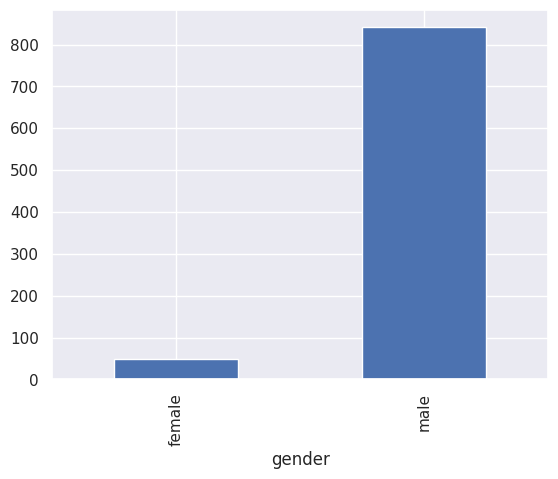

In [83]:
by_gender = df.groupby("gender")
by_gender.size().plot(kind="bar")

In [84]:
by_gender.size()

gender
female     48
male      841
dtype: int64

In [85]:
by_cat_gen = df.groupby(["category", "gender"])

In [86]:
by_cat_gen.size()

category                gender
Chemistry               female      4
                        male      170
Economics               female      1
                        male       77
Literature              female     13
                        male      101
Peace                   female     16
                        male       87
Physics                 female      2
                        male      204
Physiology or Medicine  female     12
                        male      202
dtype: int64

<Axes: ylabel='category,gender'>

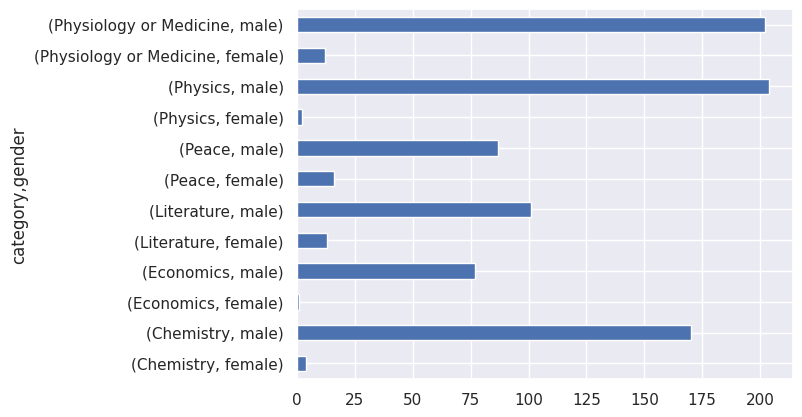

In [87]:
by_cat_gen.size().plot(kind="barh")

データを横持ちにして再度プロットしてみます。

In [88]:
by_cat_gen.size().unstack()

gender,female,male
category,,
Chemistry,4,170
Economics,1,77
Literature,13,101
Peace,16,87
Physics,2,204
Physiology or Medicine,12,202


<Axes: ylabel='category'>

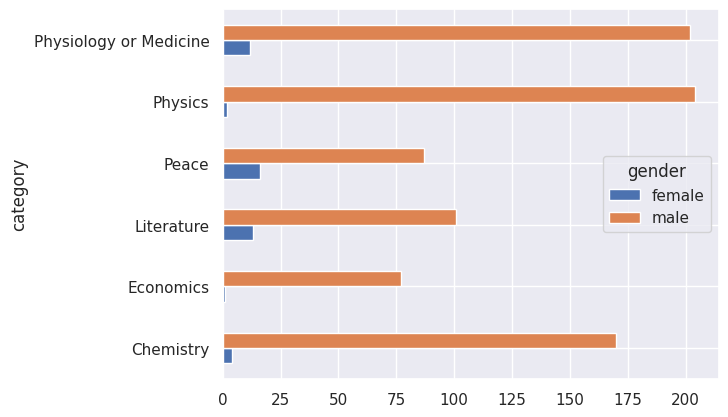

In [89]:
by_cat_gen.size().unstack().plot(kind="barh")

受賞者の合計を計算し、女性受賞者の人数順に並べ替えます。

<Axes: ylabel='category'>

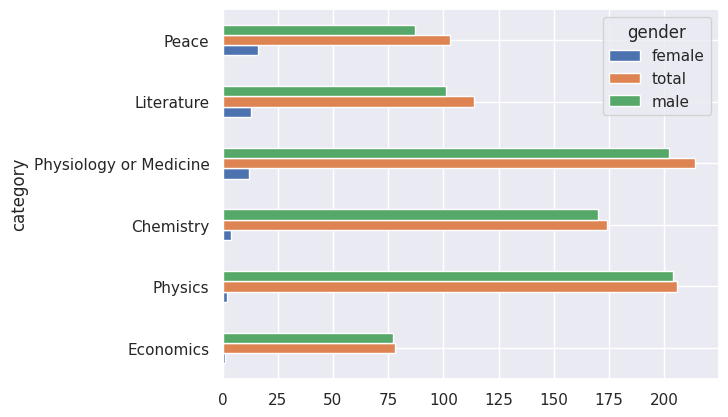

In [90]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz["total"] = cat_gen_sz.sum(axis=1)
cat_gen_sz = cat_gen_sz.sort_values(by="female", ascending=True)
cat_gen_sz[["female", "total", "male"]].plot(kind="barh")

In [91]:
df[(df.category == 'Physics') & (df.gender == 'female')][['name', 'country','year']]

,name,country,year
312,Maria Goeppert-Mayer,United States,1963
706,Marie Skłodowska-Curie,Poland,1903


[マリア・ゲッパート＝メイヤー](https://ja.wikipedia.org/wiki/%E3%83%9E%E3%83%AA%E3%82%A2%E3%83%BB%E3%82%B2%E3%83%83%E3%83%91%E3%83%BC%E3%83%88%EF%BC%9D%E3%83%A1%E3%82%A4%E3%83%A4%E3%83%BC)

「原子核の殻構造に関する研究」

インタラクティブな図を作ると、細かい数値が見やすい。

In [92]:
!pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


In [93]:
import plotly.express as px
from plotly import offline

In [94]:
count_df = cat_gen_sz.stack().reset_index()

In [95]:
count_df = count_df.rename(columns={0: "count"})

In [96]:
count_df

,category,gender,count
0,Economics,female,1
1,Economics,male,77
2,Economics,total,78
3,Physics,female,2
4,Physics,male,204
5,Physics,total,206
6,Chemistry,female,4
7,Chemistry,male,170
8,Chemistry,total,174
9,Physiology or Medicine,female,12


Tidy dataにしてから使う。

In [158]:
!pip install nbformat>=5.1
!pip show nbformat

Name: nbformat
Version: 4.2.0
Summary: The Jupyter Notebook format
Home-page: http://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: BSD
Location: /home/mayu/infovis/virtualenvs/.venv/lib/python3.12/site-packages
Requires: ipython-genutils, jsonschema, jupyter-core, traitlets
Required-by: jupyter_server, nbclient, nbconvert


In [100]:
!pip install jupyter ipython

  Using cached notebook-7.2.2-py3-none-any.whl.metadata (10 kB)
  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.14.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cac

In [157]:
fig = px.bar(count_df, x="count", y="category", color="gender", barmode="group")
offline.iplot(fig)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### 歴史的傾向

例えば、女性の受賞者は時間の推移によって増加しているのでしょうか？時系列にプロットすることで見えてきそうです。

<Axes: xlabel='year'>

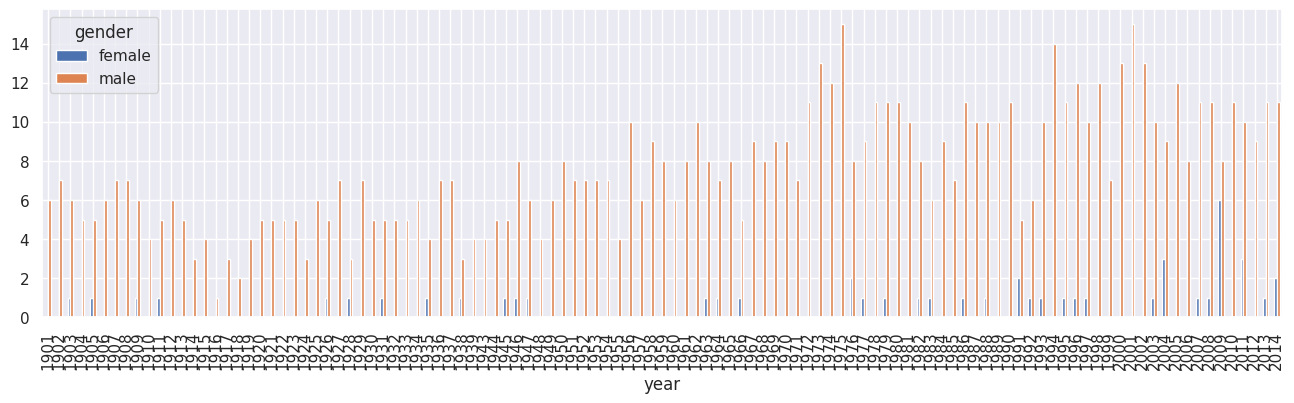

In [105]:
by_year_gender = df.groupby(["year", "gender"])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind="bar", figsize=(16, 4))

だいぶ見づらいので、x軸のラベルを調整します。

In [106]:
def thin_xticks(ax, tick_gap=10, rotation=45):
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)

    ax.figure.show()

また、欠損している受賞年（1939–1945年の第二次世界大戦中はノーベル賞が授与されませんでした）は飛ばすのではなく、欠損として表示したいと思います。

indexを振り直します。

In [107]:
new_index = pd.Index(np.arange(1901, 2015), name="year")
by_year_gender = df.groupby(["year", "gender"])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)

In [108]:
year_gen_sz

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,7.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,5.0
1906,NaN,6.0
1907,NaN,7.0
1908,NaN,7.0
1909,1.0,6.0


更に、見やすくするために図を上下に並べて表示することにします。これにはMatplotlibのサブプロットという機能を使います。

Text(0.5, 0, 'Year')

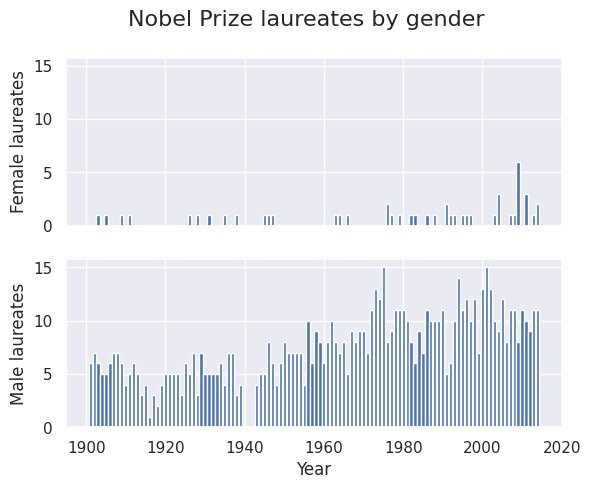

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

ax_f = axes[0]
ax_m = axes[1]

fig.suptitle("Nobel Prize laureates by gender", fontsize=16)

ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel("Female laureates")

ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel("Male laureates")

ax_m.set_xlabel("Year")

女性の受賞者が近年増えているような気もしますが、受賞者全体が増加傾向にあるようにも見えます。共同受賞する人数が増えているためでしょうか？

これについては、例えば「知識量が爆発的に増え、研究者間・分野間の協力が必須となった現代ではノーベル賞の同時受賞人数が増えている」などと仮説を設定していろいろと探索できそうです。

更に、このデータに関しては、

* 国別の傾向
    * 人口1人当たりの受賞者数
    * 分野別の受賞数
    * 受賞分布の歴史的傾向
* 受賞者の年齢と没年齢
* 受賞者の移住

など、様々な側面で探索できそうです。

興味があったら問いを立てて、探索してみてください。

---

【演習】上で作成した可視化から2つ選び、Altairで再現してみましょう。

参考：[Altairの練習](../exercise_5/intro-to-altair.ipynb)、[Altairを使ったデータのエンコーディング](../exercise_5/encoding-with-altair.ipynb)

In [129]:
!pip install altair
!pip install vega_datasets
import pandas as pd
import altair as alt

In [126]:
#your code goes here
df = pd.read_csv("./data/nobel_prize_data_cleaned.tsv", sep="\t")
df

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,award_age
0,NaN,Physiology or Medicine,Argentina,1927-10-08,2002-03-24,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984,57
1,Bosnia and Herzegovina,Literature,Bosnia and Herzegovina,1892-10-09,1975-03-13,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961,69
2,NaN,Peace,Belgium,1829-07-26,1912-10-06,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909,80
3,NaN,Literature,Belgium,1862-08-29,1949-05-06,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911,49
4,NaN,Peace,Belgium,1854-04-22,1943-05-14,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Henri La Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,NaN,Physics,Australia,1967-02-24,NaN,male,http://en.wikipedia.org/wiki/Brian_P._Schmidt,Brian P. Schmidt,"Missoula, Montana",NaN,"Brian P. Schmidt , born in the United States ...",2011,44
885,NaN,Peace,Argentina,1878-11-01,NaN,male,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina","Carlos Saavedra Lamas , Peace, 1936",1936,58
886,NaN,Physiology or Medicine,Argentina,1887-04-10,NaN,male,http://en.wikipedia.org/wiki/Bernardo_Houssay,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina","Bernardo Houssay , Physiology or Medicine, 1947",1947,60
887,France,Chemistry,Argentina,1906-09-06,NaN,male,http://en.wikipedia.org/wiki/Luis_Federico_Leloir,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina","Luis Federico Leloir , Chemistry, 1970",1970,64


In [130]:
chart = alt.Chart(df)

In [133]:
gender_count = df['gender'].value_counts().reset_index()
gender_count.columns = ['gender', 'count']

# Altairで棒グラフを作成
chart = alt.Chart(gender_count).mark_bar().encode(
    x='gender:N',  # X軸にgender（カテゴリカルデータ）
    y='count:Q'    # Y軸にcount（数値データ）
)

# チャートを表示
chart.show()

alt.Chart(...)

In [147]:
# category と gender 列でグループ化し、各グループのサイズをカウント
grouped_data = df.groupby(['category', 'gender']).size().reset_index(name='count')

# Altairで棒グラフを作成（同じカテゴリ内で男女のバーを上下に並べる）
chart = alt.Chart(grouped_data).mark_bar().encode(
    y='category:N',    # Y軸にカテゴリ（category）
    x='count:Q',       # X軸にカウント（数値）
    color='gender:N',  # 性別（gender）で色分け
    row='gender:N'   # 性別ごとに別々の行に分けて表示
)

# チャートを表示
chart.show()

alt.Chart(...)

In [153]:
# "year" と "gender" でグループ化して人数をカウント
grouped_data = df.groupby(['year', 'gender']).size().reset_index(name='count')

# Altairで棒グラフを作成
chart = alt.Chart(grouped_data).mark_bar().encode(
    x='year:O',      # X軸: 年（年ごとに表示）
    y='count:Q',     # Y軸: 人数（カウント）
    color='gender:N', # 性別ごとに色分け
    row='gender:N'   # 性別ごとに別々の行に分けて表示
).properties(
    width=800,  # 各バーの幅
    height=400  # 高さ
)


# チャートを表示
chart.show()

alt.Chart(...)